# Database 

https://archive.ics.uci.edu/ml/datasets/online+news+popularity

In [1]:
# Import funct
from aux import *
seed = 2020

Firsly, the dataset is read using Pandas. The file is supposed to be located in ```../dataset/```.

In [2]:
dataset = pd.read_csv('../dataset/OnlineNewsPopularity.csv',
                      sep = ', ',
                      engine = 'python',
                      header = 0,
                      usecols = [i for i in range(2, 62)],
                      index_col = False,
                      dtype = np.float64)
dataset.iloc[:, -1] = dataset.iloc[:, -1].apply(
        lambda x: -1.0 if x < 1400 else 1.0)

Display the first 5 rows of the dataset.

In [3]:
dataset.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,-1.0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,-1.0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1.0
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,-1.0
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,-1.0


We separate the diagnosys column and drop the identifier (not a .

In [4]:
X = dataset.drop('shares', axis=1).sample(frac=1, random_state=seed)
y = dataset['shares'].sample(frac=1, random_state=seed)
X, _, y, _ = train_test_split(X, y, train_size=15000, stratify=y, random_state=seed)

We shown the number of Benign and Malign samples.

In [5]:
y.value_counts()

 1.0    8004
-1.0    6996
Name: shares, dtype: int64

# Constants

In [6]:
# Hidden space dimensionality
hidden_space_dim = 2
# Ammount of samples
n_samples = X.shape[0]
# Observed space dimensionality
observed_space_dim = X.shape[1]
# Hidden layer dimension for Non-linear PCA and VAE
hidden_layer_dim = 100
# Training epochs
num_epochs = 4000
# Learning rate for Adam optimizer
learning_rate = 0.01

# Probabilistic PCA

In [7]:
# create an instance of the P model and the Q model
pca_model = pca(hidden_space_dim, observed_space_dim)
pca_q = Q_pca(hidden_space_dim, observed_space_dim)

# Define optimizer 
optimizer = tf.train.AdamOptimizer(learning_rate)
# Define inference object
VI_pca = inf.inference.VI(pca_q, optimizer=optimizer, epochs=num_epochs)

We fit the model using the dataset ```X```.

In [8]:
pca_model.fit({"x": X}, VI_pca)        


 0 epochs	 5292962003025920.0....................
 200 epochs	 5292826711556096.0....................
 400 epochs	 5291961275645952.0....................
 600 epochs	 5290128398352384.0....................
 800 epochs	 5287920248291328.0....................
 1000 epochs	 5285078053683200.0....................
 1200 epochs	 5281504104022016.0....................
 1400 epochs	 5278958262157312.0....................
 1600 epochs	 5273835439915008.0....................
 1800 epochs	 5268782410891264.0....................
 2000 epochs	 5264279137681408.0....................
 2200 epochs	 5258941030203392.0....................
 2400 epochs	 5252942034632704.0....................
 2600 epochs	 5245251358818304.0....................
 2800 epochs	 5241374077091840.0....................
 3000 epochs	 5233464894816256.0....................
 3200 epochs	 5229206434742272.0....................
 3400 epochs	 5220808699936768.0....................
 3600 epochs	 5209741106085888.0....................

The evolution of the loss function over the training is:

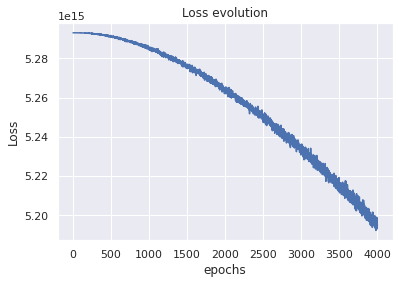

In [9]:
print_loss_function(VI_pca)

We plot the posterior using the learned model and the data.

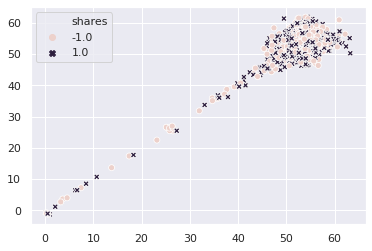

In [10]:
z = pca_model.posterior("z", data={"x": X}).sample()
print_posterior(z, y)

We can obtain the transformation by taking the mean values of ```w``` and ```w0```.

In [11]:
post = pca_model.posterior("w").parameters()
print("Loc:", post["loc"])
print("Scale:", post["scale"])

Loc: [[ 6.98629096e-02  5.10008287e+00  1.22307742e-03  4.15970525e-03
   3.92116839e-04  8.08901787e-02  1.17123788e-02  2.29280144e-02
  -1.98885589e-03  2.32309196e-02  4.05660383e-02 -3.09604779e-03
  -9.56677890e-04 -3.44721787e-03 -6.55750604e-03 -6.56373752e-03
  -1.22957374e-03  9.74835232e-02  1.08050594e+01  2.78822088e+00
   5.49067879e+01  5.79716530e+01  5.78828392e+01  1.04626875e+01
   4.82478065e+01  3.18973026e+01  4.19119682e+01  5.38099937e+01
   5.01585770e+01 -7.18145864e-04 -2.11996585e-03 -1.71198079e-03
   1.34183757e-03 -9.01287235e-03 -1.52862421e-03 -3.67193390e-03
  -4.72643273e-03 -4.23693797e-03 -9.00701154e-04  1.99260516e-03
  -1.71043281e-03 -4.13265359e-03 -1.86070940e-03 -4.18386050e-03
  -1.19793601e-03 -1.41031714e-03 -9.93232243e-05 -2.34875386e-03
   4.02574241e-03  1.80907722e-03  2.18591862e-03 -3.01985955e-03
   2.40702345e-03 -1.15204847e-03  3.46231693e-03 -5.56660816e-05
  -1.25431223e-03  1.59344613e-03]
 [ 6.80724531e-02  4.97267818e+00  8

In [12]:
post = pca_model.posterior("w0").parameters()
print("Loc:", post["loc"])
print("Scale:", post["scale"])

Loc: [ 3.0472970e+00  6.5634718e+00  6.0842240e-01  1.0022725e+00
  6.8371713e-01  2.9095256e+00  2.3272007e+00  2.4524622e+00
  1.0104172e+00  2.6951065e+00  3.0753357e+00  2.9230163e-01
  3.3775884e-01  3.4908402e-01  3.6008450e-01  4.0767762e-01
  3.8697618e-01  6.4090328e+00  9.6351910e+00  5.4157147e+00
  3.7873608e+01  4.0951244e+01  4.0858620e+01  8.9862738e+00
  3.1177488e+01  2.0444647e+01  2.6657251e+01  3.6658298e+01
  3.3041935e+01  4.6709284e-01  3.2244140e-01  3.9179650e-01
  3.2910258e-01  3.5339379e-01  2.6704729e-01  2.8701293e-01
  3.3191571e-01  3.3180007e-01  3.6561882e-01  3.6614785e-01
  4.5327550e-01  4.4737813e-01  6.1243820e-01  3.0081257e-01
  2.9826969e-01  2.6791292e-01  6.9319761e-01  4.1907391e-01
  4.6206102e-01  3.5605595e-01  7.3504972e-01  9.3852142e-03
 -8.3265580e-02  1.5326476e-01  3.7799656e-01  2.8426051e-01
  4.8797363e-01  3.5217059e-01]
Scale: [0.12383188 0.96424174 0.06749291 0.06285575 0.06495122 0.1274167
 0.07276839 0.07621044 0.06991433 0.

# Non-linear PCA

In [13]:
# create an instance of the P model and the Q model
nlpca_model = nlpca(hidden_space_dim, hidden_layer_dim, observed_space_dim)
nlpca_q = Q_nlpca(hidden_space_dim, hidden_layer_dim, observed_space_dim)

# Define optimizer 
optimizer = tf.train.AdamOptimizer(learning_rate)
# Define inference object
VI_nlpca = inf.inference.VI(nlpca_q, optimizer=optimizer, epochs=num_epochs)

In [14]:
nlpca_model.fit({"x": X}, VI_nlpca)        


 0 epochs	 5292160991625216.0....................
 200 epochs	 5249877575467008.0....................
 400 epochs	 4502058807853056.0....................
 600 epochs	 2514370223407104.0....................
 800 epochs	 894633097822208.0....................
 1000 epochs	 294908560670720.0....................
 1200 epochs	 154990991638528.0....................
 1400 epochs	 146859444142080.0....................
 1600 epochs	 141787658190848.0....................
 1800 epochs	 138661525979136.0....................
 2000 epochs	 138735739994112.0....................
 2200 epochs	 135574417571840.0....................
 2400 epochs	 134991543533568.0....................
 2600 epochs	 138036004257792.0....................
 2800 epochs	 134046180966400.0....................
 3000 epochs	 133934327267328.0....................
 3200 epochs	 134790208552960.0....................
 3400 epochs	 136515275456512.0....................
 3600 epochs	 133514359996416.0....................
 3800 epochs	 

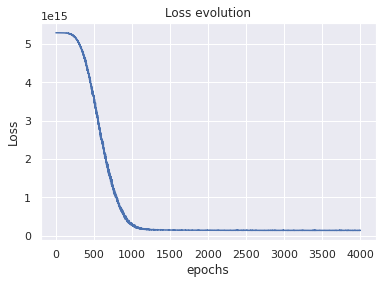

In [15]:
print_loss_function(VI_nlpca)

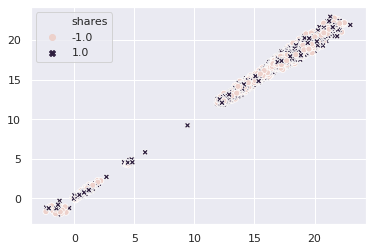

In [16]:
z = nlpca_model.posterior("z", data={"x": X}).sample()
print_posterior(z, y)

# Variational auto-encoder

In [17]:
vae_model = vae(hidden_space_dim, hidden_layer_dim, observed_space_dim)
q_vae = Q_vae(hidden_space_dim , hidden_layer_dim, observed_space_dim)

optimizer = tf.train.AdamOptimizer(learning_rate)
VI_vae = inf.inference.VI(q_vae, optimizer=optimizer, epochs=num_epochs)

In [18]:
vae_model.fit({"x": X}, VI_vae)


 0 epochs	 5114596306190336.0....................
 200 epochs	 64038675415040.0....................
 400 epochs	 45169239916544.0....................
 600 epochs	 31119584002048.0....................
 800 epochs	 23578688880640.0....................
 1000 epochs	 30913159233536.0....................
 1200 epochs	 17975125999616.0....................
 1400 epochs	 15717975982080.0....................
 1600 epochs	 14683651178496.0....................
 1800 epochs	 15232574423040.0....................
 2000 epochs	 14256859774976.0....................
 2200 epochs	 12982614491136.0....................
 2400 epochs	 18581200830464.0....................
 2600 epochs	 13760198606848.0....................
 2800 epochs	 11860336181248.0....................
 3000 epochs	 12640026886144.0....................
 3200 epochs	 16032306561024.0....................
 3400 epochs	 10655271747584.0....................
 3600 epochs	 11006255300608.0....................
 3800 epochs	 10568342700032.0.....

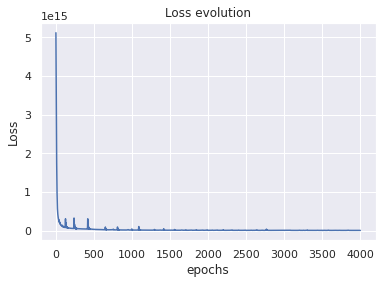

In [19]:
print_loss_function(VI_vae)

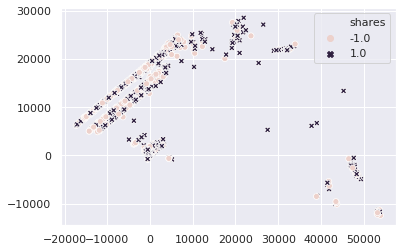

In [20]:
z = vae_model.posterior("z", data={"x": X}).sample()
print_posterior(z, y)